# ADA Project - Insight into world agriculture production and its links to global hunger

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

## Load data  into a Pandas dataframe

In [12]:
complete_dataset = pd.read_csv('../data/fao_data_crops_data.csv')

In [13]:
# We split the data and metadata and store them in 'crops' and 'flags' dataframe, respecitvely.
crops = complete_dataset.loc[:2255342].copy() 
flags = complete_dataset.loc[2255344:2255348].copy() 
# 'flags' contains correspondance list of acronyms that describe how a given sample was acquired --> only informative
flags.drop(['element','year','unit','value','value_footnotes','category'], axis=1, inplace = True) 
flags.rename(columns={'country_or_area':'acronym', 'element_code':'description'}, inplace=True) 
flags.set_index('acronym', inplace=True)
flags

,description
acronym,
Fc,Calculated Data
A,"May include official, semi-official or estimat..."
NR,Not reported by country
F,FAO Estimate
*,Unofficial figure


## Exploratory data analysis

In [14]:
crops.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [15]:
print("Size of the DataFrame: {s}\n".format(s=crops.shape))
print("Variable types present in DataFrame: \n{t}".format(t=crops.dtypes))

Size of the DataFrame: (2255343, 8)

Variable types present in DataFrame: 
country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object


In [16]:
# List all the different footnotes values present in the dataset
footnotes = crops['value_footnotes'].unique() 
print(footnotes)
# Display dataframe that only contains one given value of 'value_footnotes'
display(crops.query('value_footnotes==@footnotes[4]')) 
# Return dataframe that only contains samples having NaN as value for 'value_footnotes'
crops[crops.value_footnotes.isnull()] 

['A ' 'F ' nan 'Fc' 'NR']


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
1389,Mexico,31,Area Harvested,1981.0,Ha,0.0,NR,agave_fibres_nes
1390,Mexico,31,Area Harvested,1980.0,Ha,0.0,NR,agave_fibres_nes
1391,Mexico,31,Area Harvested,1979.0,Ha,0.0,NR,agave_fibres_nes
1392,Mexico,31,Area Harvested,1978.0,Ha,0.0,NR,agave_fibres_nes
1393,Mexico,31,Area Harvested,1977.0,Ha,0.0,NR,agave_fibres_nes
...,...,...,...,...,...,...,...,...
2254398,Puerto Rico,51,Production Quantity,1965.0,tonnes,0.0,NR,yautia_cocoyam
2254399,Puerto Rico,51,Production Quantity,1964.0,tonnes,0.0,NR,yautia_cocoyam
2254400,Puerto Rico,51,Production Quantity,1963.0,tonnes,0.0,NR,yautia_cocoyam
2254401,Puerto Rico,51,Production Quantity,1962.0,tonnes,0.0,NR,yautia_cocoyam


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
567,Colombia,31,Area Harvested,2004.0,Ha,17294.0,NaN,agave_fibres_nes
568,Colombia,31,Area Harvested,2003.0,Ha,17094.0,NaN,agave_fibres_nes
569,Colombia,31,Area Harvested,2002.0,Ha,17391.0,NaN,agave_fibres_nes
570,Colombia,31,Area Harvested,2001.0,Ha,16802.0,NaN,agave_fibres_nes
571,Colombia,31,Area Harvested,2000.0,Ha,17987.0,NaN,agave_fibres_nes
...,...,...,...,...,...,...,...,...
2255150,"Venezuela, Bolivarian Republic of",51,Production Quantity,1965.0,tonnes,61062.0,NaN,yautia_cocoyam
2255151,"Venezuela, Bolivarian Republic of",51,Production Quantity,1964.0,tonnes,59225.0,NaN,yautia_cocoyam
2255152,"Venezuela, Bolivarian Republic of",51,Production Quantity,1963.0,tonnes,57500.0,NaN,yautia_cocoyam
2255153,"Venezuela, Bolivarian Republic of",51,Production Quantity,1962.0,tonnes,55825.0,NaN,yautia_cocoyam


In [17]:
print(crops['element'].unique())
print(crops['year'].unique())
print(crops['unit'].unique())
print(crops['category'].unique())
print(crops['element_code'].unique())
print(crops['country_or_area'].unique())

['Area Harvested' 'Yield' 'Production Quantity' nan 'Seed'
 'Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']
[2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961.   nan]
['Ha' 'Hg/Ha' 'tonnes' nan '1000 Int. $' 'Int. $']
['agave_fibres_nes' 'almonds_with_shell' 'anise_badian_fennel_corian'
 'apples' 'apricots' 'arecanuts' 'artichokes' 'asparagus' 'avocados'
 'bambara_beans' 'bananas' 'barley' 'beans_dry' 'beans_green'
 'berries_nes' 'blueberries' 'brazil_nuts_with_shell'
 'broad_beans_horse_beans_dry' 'buckwheat' 'cabbages_and_other_brassicas'
 'canary_seed' 'carobs' 'carrots_and_turnips' 'cashew_n

## Data preprocessing

We clear the data by dropping all the row containing only NAN values. 
We also clear the raw where value_footnotes is NR as it means not repported by country, so it won't be usefull for our analysis. 

In [18]:
# Returns a boolean of whether a column contains NaN (True) or not (False).
print(crops.isnull().values.any(axis=0)) 

# Drop rows which contain only missing values.
crops.dropna(how='all', inplace=True) 



[False False  True  True  True  True  True False]


In [19]:
# We drop the samples where 'value' is unknown (NaN) because they are of no utility    
crops.dropna(subset=['value', 'value_footnotes'], inplace=True) 

# Let's drop also all the samples that have 'NR' as a 'value_footnotes' value or 0 as 'value'
crops.drop(index=crops[crops['value_footnotes'].str.contains('NR')].index, inplace=True)
crops.drop(index=crops[crops['value']==0].index, inplace=True)


In our dataset, regions are indicated by a + at the end of their names. We want to separate regions from countries to facilitate our analysis so we can be more precise. 

In [20]:
regions_bool = crops['country_or_area'].str.contains('\+')
crops_regions = crops[regions_bool].copy()
crops_countries = crops[~regions_bool].copy()
crops_countries[crops_countries.country_or_area.str.contains('China')].tail(10)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
2218498,"China, mainland",41,Yield,1970.0,Hg/Ha,11475.0,Fc,wheat
2218499,"China, mainland",41,Yield,1969.0,Hg/Ha,10854.0,Fc,wheat
2218500,"China, mainland",41,Yield,1968.0,Hg/Ha,11145.0,Fc,wheat
2218501,"China, mainland",41,Yield,1967.0,Hg/Ha,11270.0,Fc,wheat
2218502,"China, mainland",41,Yield,1966.0,Hg/Ha,10580.0,Fc,wheat
2218503,"China, mainland",41,Yield,1965.0,Hg/Ha,10216.0,Fc,wheat
2218504,"China, mainland",41,Yield,1964.0,Hg/Ha,8210.0,Fc,wheat
2218505,"China, mainland",41,Yield,1963.0,Hg/Ha,7779.0,Fc,wheat
2218506,"China, mainland",41,Yield,1962.0,Hg/Ha,6929.0,Fc,wheat
2218507,"China, mainland",41,Yield,1961.0,Hg/Ha,5578.0,Fc,wheat


We calculate the mean of all the elements for every country so we can compare the area harvested, seed or yield between each country. The mean is calculated over all years. 

In [21]:
#calculate the mean of all the elements for every country.  
crops_countries_by_country_year = crops_countries.groupby(['country_or_area', 'element']) \
                            .agg({'value':'mean'}) \
                            .rename(columns={'value':'mean_'}) 
                            #.sort_values(by='value',ascending=False)
crops_countries_by_country_year

mean_
country_or_area element                                            
Afghanistan     Area Harvested                        242601.956925
                Gross PIN (base 1999-2001)               144.595745
                Gross Production 1999-2001 (1000 I$)  552737.382979
                Grs per capita PIN (base 1999-2001)      210.723404
                Net PIN (base 1999-2001)                 146.744681
...                                                             ...
Zimbabwe        Net Production 1999-2001 (1000 I$)    231112.829787
                Net per capita PIN (base 1999-2001)      144.297872
                Production Quantity                   157003.056911
                Seed                                   11393.516165
                Yield                                  52685.685310

[1955 rows x 1 columns]

In [22]:
area_harvested = crops_countries_by_country_year.loc[(slice(None),'Area Harvested'), :]
#area_harvested.mean_.argmax()
area_harvested.loc['United States of America']

,mean_
element,
Area Harvested,1.157010e+07


#### Create a map showing yield by country (average over all years) 

In [23]:
yield_df= crops_countries_by_country_year.loc[(slice(None),'Yield'), :]
#we take the log value for the following plot, so our quantile a more equilibrate
log_yield_df=pd.DataFrame(yield_df.mean_.map(lambda x:np.log(x)))
log_yield_df.head()


,,mean_
country_or_area,element,
Afghanistan,Yield,10.787559
Albania,Yield,11.004285
Algeria,Yield,10.720772
American Samoa,Yield,10.409717
Angola,Yield,10.522206


In [26]:
m = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(yield_df.mean_.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_yield_df,
    columns=[log_yield_df.index.get_level_values(level='country_or_area').values,'mean_'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='yield',
    #bins = Bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

The countries having the most important yield are Iceland and Danemark. We can also see that in many countries of Africa the yield is very low. Mongolia has also a very low yield.

#### Area Hervested (mean)/Area Hervested (2018) by country --> Kind of average by year...


Not really sure about how we could interpret this... 
Maybe we should do an average for each year and make an interactive plot so we can select the year we want to analyze and show the map. 

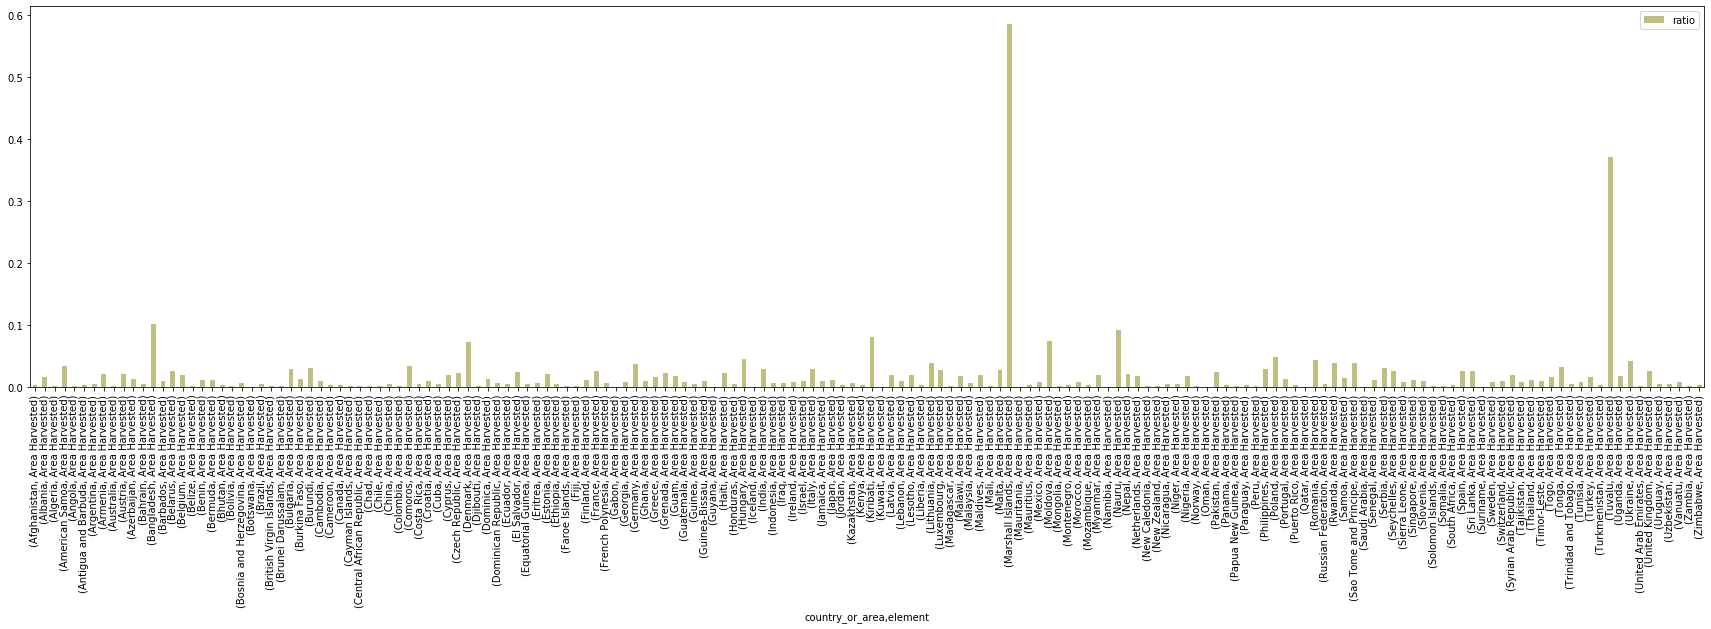

In [27]:
surface_country = pd.read_csv('../data/API_AG.LND.TOTL.K2_DS2_en_csv_v2_422954.csv', skiprows=3)
surface_country.set_index('Country Name', inplace = True)
crops_countries_area = area_harvested.join(surface_country['2018'], on='country_or_area', how='left')
crops_countries_area['ratio'] = area_harvested['mean_']/(crops_countries_area['2018']*100)
crops_countries_area.dropna(inplace=True)
#plt.bar(crops_countries_area_mean_nobermuda.index.get_level_values(level='country_or_area').values, height='ratio')
#plt.show()
pl = crops_countries_area.plot(kind="bar", 
                             y="ratio", 
                            figsize=(30, 7), alpha=0.5, color="olive")

In [28]:
crops_countries_area.head()

,,mean_,2018,ratio
country_or_area,element,,,
Afghanistan,Area Harvested,242601.956925,652860.0,0.003716
Albania,Area Harvested,42248.004417,27400.0,0.015419
Algeria,Area Harvested,293350.081841,2381740.0,0.001232
American Samoa,Area Harvested,690.087819,200.0,0.034504
Angola,Area Harvested,129773.309719,1246700.0,0.001041


#### Create a map showing this ratio by country

In [29]:
crops_countries_area_df=pd.DataFrame(crops_countries_area.ratio)
crops_countries_area_df.head()
log_df=pd.DataFrame(crops_countries_area_df.ratio.map(lambda x:np.log(x)))
type(log_df)

pandas.core.frame.DataFrame

In [30]:
m = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(crops_countries_area.ratio.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_df,
    columns=[crops_countries_area.index.get_level_values(level='country_or_area').values,'ratio'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='country surface vs surface harvested ratio',
    #bins = Bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

In [31]:
crops_countries_by_country_by_category = crops_countries.groupby(['country_or_area','element', 'category'])
crops_countries_by_country_by_category = pd.DataFrame(data=crops_countries_by_country_by_category.value.sum().reset_index(name='total').sort_values(by='total',ascending=False))

crops_countries_by_country_by_category.head(10)

,country_or_area,element,category,total
5890,China,Production Quantity,cereals_total,1.471658e+10
6154,"China, mainland",Production Quantity,cereals_total,1.458751e+10
32139,United States of America,Production Quantity,cereals_total,1.300548e+10
32138,United States of America,Production Quantity,cereals_rice_milled_eqv,1.290510e+10
5889,China,Production Quantity,cereals_rice_milled_eqv,1.235944e+10
6153,"China, mainland",Production Quantity,cereals_rice_milled_eqv,1.226976e+10
32143,United States of America,Production Quantity,coarse_grain_total,1.015979e+10
14089,India,Production Quantity,cereals_total,7.686458e+09
5974,China,Production Quantity,vegetables_melons_total,7.017600e+09
6238,"China, mainland",Production Quantity,vegetables_melons_total,6.897959e+09


we can see that China and the united states are the main producers of cereals_total and cereale_rice_milled_eq. 

  
 ## What are the principal foodstuffs produced in each country/region of the world? And which countries are the biggest producers for a given food?

In [32]:
main_product=crops_countries_by_country_by_category.drop_duplicates(subset='country_or_area', keep='first')
main_product.head(10)

,country_or_area,element,category,total
5890,China,Production Quantity,cereals_total,1.471658e+10
6154,"China, mainland",Production Quantity,cereals_total,1.458751e+10
32139,United States of America,Production Quantity,cereals_total,1.300548e+10
14089,India,Production Quantity,cereals_total,7.686458e+09
31339,USSR,Production Quantity,cereals_total,4.958993e+09
10944,France,Production Quantity,cereals_total,2.266594e+09
4980,Canada,Production Quantity,cereals_rice_milled_eqv,2.027433e+09
14343,Indonesia,Production Quantity,cereals_total,1.906435e+09
3737,Brazil,Production Quantity,cereals_total,1.686881e+09
22418,Nigeria,Production Quantity,roots_and_tubers_total,1.665520e+09


<div class="alert alert-block alert-alert">
    
  We decide to keep only the Production quantity.

In [33]:
ind_keep=pd.Series(main_product.element.str.contains('Production Quantity'))
ind_keep=ind_keep[ind_keep].index

main_product_quantity = main_product.drop(index=main_product.index.difference(ind_keep))
main_product_quantity.head(10)

,country_or_area,element,category,total
5890,China,Production Quantity,cereals_total,1.471658e+10
6154,"China, mainland",Production Quantity,cereals_total,1.458751e+10
32139,United States of America,Production Quantity,cereals_total,1.300548e+10
14089,India,Production Quantity,cereals_total,7.686458e+09
31339,USSR,Production Quantity,cereals_total,4.958993e+09
10944,France,Production Quantity,cereals_total,2.266594e+09
4980,Canada,Production Quantity,cereals_rice_milled_eqv,2.027433e+09
14343,Indonesia,Production Quantity,cereals_total,1.906435e+09
3737,Brazil,Production Quantity,cereals_total,1.686881e+09
22418,Nigeria,Production Quantity,roots_and_tubers_total,1.665520e+09


In [34]:
main_product_quantity.category.unique()

array(['cereals_total', 'cereals_rice_milled_eqv',
       'roots_and_tubers_total', 'oil_palm_fruit', 'sugar_cane',
       'fruit_excl_melons_total', 'vegetables_melons_total', 'coconuts',
       'fibre_crops_primary', 'grapes'], dtype=object)

<div class="alert alert-block alert-alert">
    In the previous dataframe (main_product_quantity) we show the category that is most produced by each country in term of production quantity. 
    

 <div class="alert alert-block alert-info">
    
   In this dataframe, we can see that China and the United States are the main producers of cereals, Canada is the main producer of cereals_rice_milled. Nigeria and Poland are the mais producers of roots and tubbers. Philippines mainly produces sugar cane and Malesia mainly produces oil_palm_fruit.
 


## Are all countries equal in terms of diversity of foodstuffs harvested?
    

In [35]:
food_diversity = pd.DataFrame(crops_countries.groupby(['country_or_area','category'])['category'].count().reset_index(name='total'))
food_diversity.head(10)

,country_or_area,category,total
0,Afghanistan,almonds_with_shell,69
1,Afghanistan,anise_badian_fennel_corian,66
2,Afghanistan,apples,139
3,Afghanistan,apricots,136
4,Afghanistan,barley,98
5,Afghanistan,berries_nes,139
6,Afghanistan,cereals_rice_milled_eqv,188
7,Afghanistan,cereals_total,470
8,Afghanistan,citrus_fruit_nes,136
9,Afghanistan,citrus_fruit_total,141


In [36]:
food_diversity = pd.DataFrame(food_diversity.groupby(['country_or_area']).country_or_area.size().reset_index(name='category_diversity'))

In [40]:
food_diversity.sort_values('category_diversity', ascending=False).head(10)

,country_or_area,category_diversity
40,"China, mainland",127
124,Mexico,120
39,China,117
180,Spain,114
198,Turkey,110
130,Morocco,108
151,Peru,105
207,United States of America,105
94,Italy,103
90,"Iran, Islamic Republic of",100


Should we combine China and China, mainland?? 

In [41]:
food_producer = pd.DataFrame(crops_countries.groupby(['category']))#['category'].count().reset_index(name='total'))
food_producer.head(10)

,0,1
0,agave_fibres_nes,country_or_area element_code ...
1,almonds_with_shell,country_or_area element_code ...
2,anise_badian_fennel_corian,country_or_area element_code ...
3,apples,country_or_area element_code ...
4,apricots,country_or_area element_code ...
5,arecanuts,country_or_area element_code ...
6,artichokes,country_or_area element_code ...
7,asparagus,country_or_area element_code ...
8,avocados,country_or_area element_code ...
9,bambara_beans,country_or_area element_code ...


Pas finie cette step?

## Interactive visualization of categories by year and by element

Categories are the different products.
Element corresponds to yield, harvested area, production quantity ... ect 


#### Interactive visualization plot #1


In [42]:
#TO RUN THIS: with conda --> conda install -c conda-forge ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#To enable interactive viz on lab --> conda install nodejs
#                                  + jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [43]:
#Interactive visualization
def viz_year(year, element, category):
    df_to_plot = crops_regions.loc[crops_regions['year'] == year].loc[crops_regions['element'] == element].loc[crops_regions['category'] == category]
    df_to_plot.plot(kind = 'bar', x='country_or_area', y='value',figsize=(20,10))
    plt.title(f'{element} values of {category} by regions for year {year}', fontsize=20)
    plt.xlabel("Regions", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()

years = crops_regions.year.unique()    
elements = crops_regions.element.unique()
categories = crops_regions.category.unique()
interact(viz_year, year=years, element = elements , category=categories)    

interactive(children=(Dropdown(description='year', options=(2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 20…

<function __main__.viz_year(year, element, category)>

We can see that for some categories there are no numerical values to plot --> Remove them from dataframe? --> only for some categories (eg cereals_total)


### Interactive visualization of element of a given category by a given country throughout years

In [44]:
#Interactive visualization
def viz_evolution(country, element, category):
    df_to_plot = crops_countries.loc[crops_countries['country_or_area'] == country].loc[crops_countries['element'] == element].loc[crops_countries['category'] == category]
    df_to_plot.plot(x='year', y='value',figsize=(20,10))
    plt.title(f'{element} values of {category} in {country} throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()

countries = crops_countries.country_or_area.unique()    
elements = crops_countries.element.unique()
categories = crops_countries.category.unique()
interact(viz_evolution, country=countries, element = elements , category=categories)    

interactive(children=(Dropdown(description='country', options=('Colombia', 'Cuba', 'Ecuador', 'El Salvador', '…

<function __main__.viz_evolution(country, element, category)>

Now that we have well understood our dataset we can redefine our project goals. 
As we have many datas for allmost all the country in the words we had to redefine the direction we wanted to follow. So we decided to focus our attention on one country only: Switzerland!
We will try to answer the following question: Can Switzerland be self-sufficient in term of food production.
see updates on the Readme and project_ch.ipynb